<a href="https://colab.research.google.com/github/AdnanSakal/object_detection/blob/main/Object_detction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import os
import random

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d "davidbroberts/brain-tumor-object-detection-datasets"

In [ ]:
zip_ref = zipfile.ZipFile("/content/brain-tumor-object-detection-datasets.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_data = "axial_t1wce_2_class/images/train"
test_data  = "axial_t1wce_2_class/images/test"

train_labels = "axial_t1wce_2_class/labels/train"
test_labels = "axial_t1wce_2_class/labels/test"

In [ ]:
sor_image = sorted(os.listdir(train_data))
sor_label = sorted(os.listdir(train_labels))

In [ ]:
new_sor_image = os.listdir("/content/axial_t1wce_2_class/images/train")

In [ ]:
new_sor_labels = os.listdir("/content/axial_t1wce_2_class/labels/train")

In [ ]:
image_without_labels = set(new_sor_image) - set([os.path.splitext(i)[0] + ".jpg" for i in new_sor_labels])

In [ ]:
len(image_without_labels)

14

In [ ]:
image_without_labels = list(image_without_labels)

In [ ]:
for image in image_without_labels:
  path = os.path.join("/content/axial_t1wce_2_class/images/train",image)
  os.remove(path)

In [ ]:
new_label = []
for i in sor_label:
  with open(os.path.join(train_labels,i),"r") as f:
    new_label.append(f.read())

In [ ]:
import cv2
new_image = []
for i in sorted(os.listdir(train_data)):
  path = os.path.join(train_data,i)
  new_image.append(cv2.imread(path))

In [ ]:
def make_labels(image,label):
  w_image,h_image,_ = image.shape
  center_x = float(label.split()[1])
  center_y = float(label.split()[2])
  center_w = float(label.split()[3])
  center_h = float(label.split()[4])
  x_min = int((center_x-center_w/2)*h_image)
  y_min = int((center_y-center_h/2)*w_image)
  x_max = int((center_x+center_w/2)*h_image)
  y_max = int((center_y+center_h/2)*w_image)

  return x_min,y_min,x_max,y_max

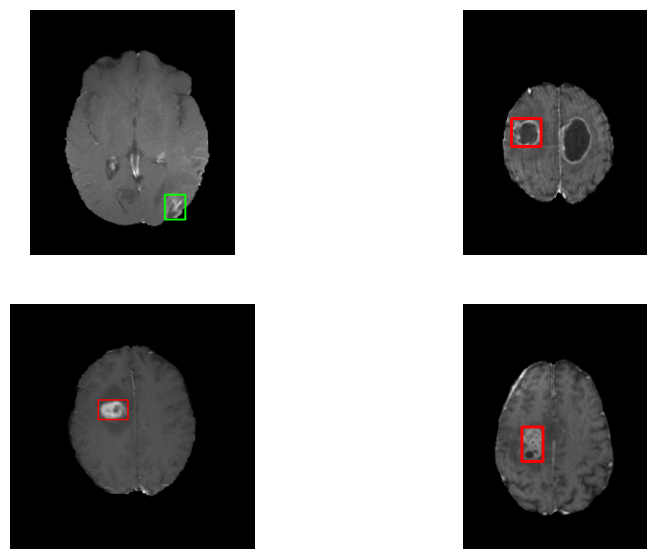

In [ ]:
plt.figure(figsize=[10,7])
for i in range(4):
  plt.subplot(2,2,i+1)
  rand = random.randint(0,len(new_image))
  x_min,y_min,x_max,y_max = make_labels(new_image[rand],new_label[rand])
  rec = cv2.rectangle(new_image[rand],(x_min,y_min),(x_max,y_max),color = [255,0,0] if float(new_label[rand].split()[0]) == 1 else [0,255,0],thickness = 2)
  plt.imshow(rec)
  plt.axis(False)

In [ ]:
text = """
train: /content/axial_t1wce_2_class/images/train
val: /content/axial_t1wce_2_class/images/test

nc: 2

names: ['negative','positive']
"""
with open("/content/axial_t1wce_2_class/axial_t1wce_2_class.yaml","w") as f:
  f.write(text)

In [ ]:
pip install ultralytics

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8n.pt")
model.train(data ="/content/axial_t1wce_2_class/axial_t1wce_2_class.yaml",
            epochs = 100
            )

In [ ]:
pred_image = "/content/axial_t1wce_2_class/images/test/00044_111.jpg"
img = cv2.imread(pred_image)


0: 640x640 1 positive, 10.3ms
Speed: 5.4ms preprocess, 10.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
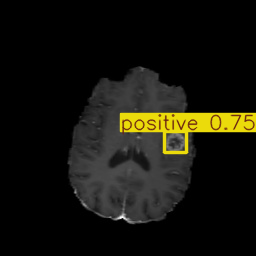

In [ ]:
model(img)[0].plot()